# Scraping Guitar Listings from Thomann

I was interested on how prices for acoustic guitars vary between different brands and different sets of parameters like age of the model, wood type or guitar shape. Also an especially interesting question for me was how prices for the same instrument or similar categories change over time.

As a first step towards getting a feel for the acoustic-steel string guitar market, I wrote a set of scripts to scrape data on different guitars from one of Europes largest online merchants for musical instruments: [Thomann](http://www.thomann.de).

I used cron to run the scraper on a daily basis running from November 2019 to April 2020. With these four months of data I'll try to get a feel for the online guitar market at Thomann.

The questions I want to answer are:

1. Which Brands have the most guitars?
2. Which Brands sell best?
3. How much do prices for the same guitar change after the initial listing?

## The Data
As a first step I will only be concentrating on steel-string guitars as this is the kind of guitar I prefer playing and also the kind of guitar where I feel my own expertise is highest. 

I pulled most of the easily available data from the site, key features are:

 * Model name
 * Manufacturer
 * Price
 * Date the Guitar was first listed
 * Thomann internal sales rank
 * Characteristics such as wood types, number of frets, cutaway, built-in electronics etc.
 



In [1]:
from clean_data import get_cleaned_guitar_data
df = get_cleaned_guitar_data()

/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/*/*.csv


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-01-23/folk_gitarren_chunk_001.csv:   0%|          | 0/1757 [00:00<?, ?it/s]/home/schaffer/anaconda3/envs/sdc/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-25/sonstige_westerngitarren_chunk_004.csv:  56%|█████▌    | 976/1757 [01:02<01:18,  9.92it/s]

error in /dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-25/sonstige_westerngitarren_chunk_005.csv
'artikelnummer'


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-20/sonstige_westerngitarren_chunk_004.csv:  78%|███████▊  | 1369/1757 [01:48<00:43,  8.90it/s]

error in /dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-20/sonstige_westerngitarren_chunk_005.csv
'artikelnummer'


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-22/sonstige_westerngitarren_chunk_004.csv:  82%|████████▏ | 1436/1757 [01:57<00:42,  7.52it/s]

error in /dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-22/sonstige_westerngitarren_chunk_005.csv
'artikelnummer'


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-18/sonstige_westerngitarren_chunk_004.csv:  83%|████████▎ | 1450/1757 [01:59<00:41,  7.45it/s]

error in /dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-03-18/sonstige_westerngitarren_chunk_005.csv
'artikelnummer'


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-02-23/sonstige_westerngitarren_chunk_004.csv:  89%|████████▊ | 1555/1757 [02:17<00:31,  6.44it/s]

error in /dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2020-02-23/sonstige_westerngitarren_chunk_005.csv
'artikelnummer'


/dat/schaffer/projects/guitar_scraping/guitar_scraping/../data/2019-11-07/jumbo_gitarren_chunk_000.csv: 100%|██████████| 1757/1757 [02:55<00:00, 10.02it/s]          


AttributeError: module 'pandas' has no attribute 'first_valid_index'

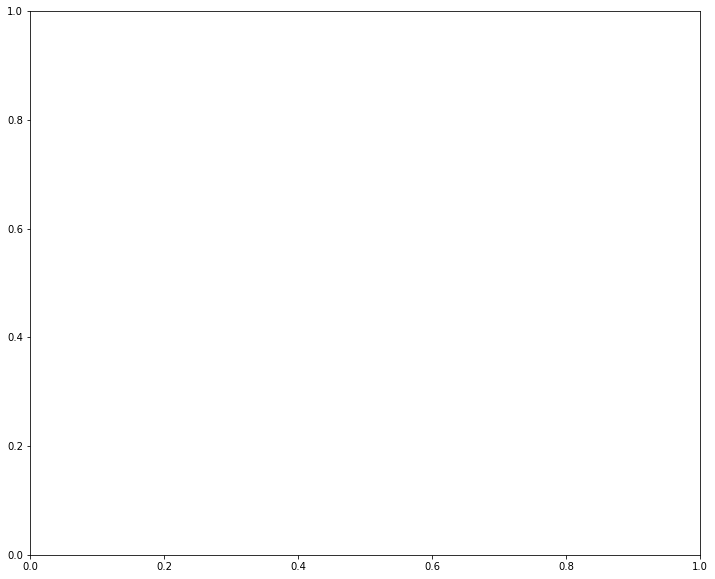

In [88]:
df.head()

dynamics = df.reset_index()[['date','preis','verkaufsrang','modell']]
dynamics.head()
pivoted= dynamics.pivot_table(index='date',columns='modell',values='preis')

f = plt.figure(figsize=(12,10))
ax = f.subplots(1)
#pivoted.ffill().mean(axis=1).plot()
sample = pivoted.ffill().iloc[:,2::20]
valid_indexes = sample.apply(pd.first_valid_index(),axis=1)
print(valid_indexes)
starting_prices = 1
sample_normalized = sample/sample.max()-1
sample_normalized.plot(ax=ax,legend=None)
plt.ylim(-1,1)
line = plt.axvline('2019-12-24') 



## Brand Analysis
I want to analyze the different brands, this implies that I should create a new Dataframe orientd on the different brands. The columns I want are:

1. Brand name
2. Number of models listed
3. Price of cheapest guitar
4. Price of most expensive guitar
5. Average guitar price
6. Number of new models for the time period
7. Average sales rank for manufacturer

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

models_per_manufacturer = df.groupby('modell')['hersteller'].first().value_counts()
price_per_manufacturer = df.groupby('modell')[['hersteller','preis']].first().groupby('hersteller')['preis']

rank_per_manufacturer = df.groupby('modell')[['hersteller','verkaufsrang']].first().groupby('hersteller')['verkaufsrang']

manufacturer_dict = dict(
    models_listed=models_per_manufacturer,
    cheapest = price_per_manufacturer.min(),
    mean_price=price_per_manufacturer.mean(),
    median_price=price_per_manufacturer.median(),
    most_expensive=price_per_manufacturer.max(),
    best_sales_rank=rank_per_manufacturer.min(),
    average_sales_rank=rank_per_manufacturer.mean(),
)

manufacturer_stats = pd.DataFrame(manufacturer_dict)
# models_per_manufacturer.tail(20)
manufacturer_stats.sort_values('average_sales_rank').head()

,models_listed,cheapest,mean_price,median_price,most_expensive,best_sales_rank,average_sales_rank
VGS,1,398.0,398.000000,398.0,398.0,32946,32946.000000
Harley Benton,151,55.0,159.298013,125.0,479.0,71,33790.437086
Brümmer,2,159.0,179.000000,179.0,199.0,34342,38815.000000
Fender,139,98.0,365.345324,259.0,3798.0,2278,41988.597122
LAG,6,509.0,900.333333,774.0,1498.0,8314,42467.000000


,mean_price,median_price,models_listed
Art & Lutherie,617.640000,639.0,25
Baton Rouge,313.441860,329.0,43
Breedlove,4465.333333,3999.0,3
Brümmer,179.000000,179.0,2
Cole Clark,2274.625000,2310.0,16
